In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data\Data Sets\USArrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


<Figure size 400x400 with 0 Axes>

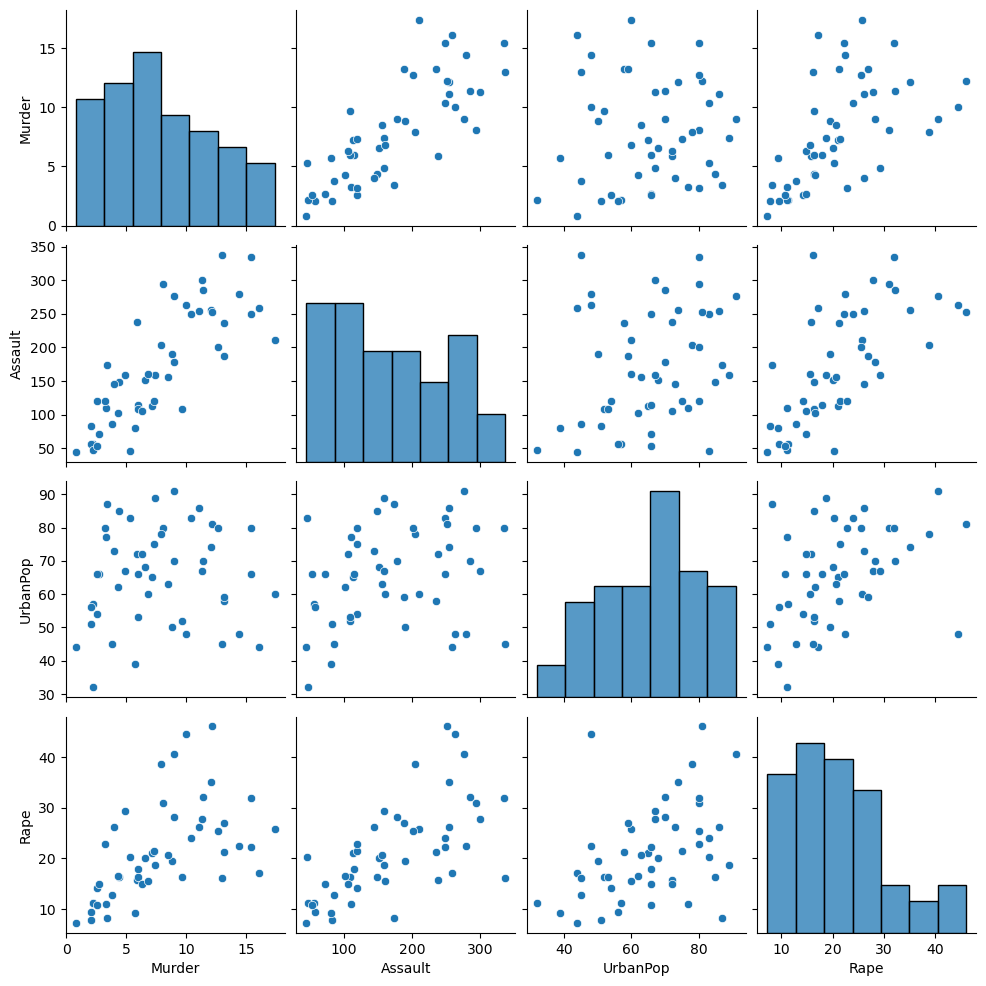

In [18]:
plt.figure(figsize=(4,4))
sns.pairplot(data=df, palette="Set2")
plt.show()

In [19]:
scalar = StandardScaler().set_output(transform='pandas')
df_scaled = scalar.fit_transform(df)

##### Using `linkage` and `dendrogram`

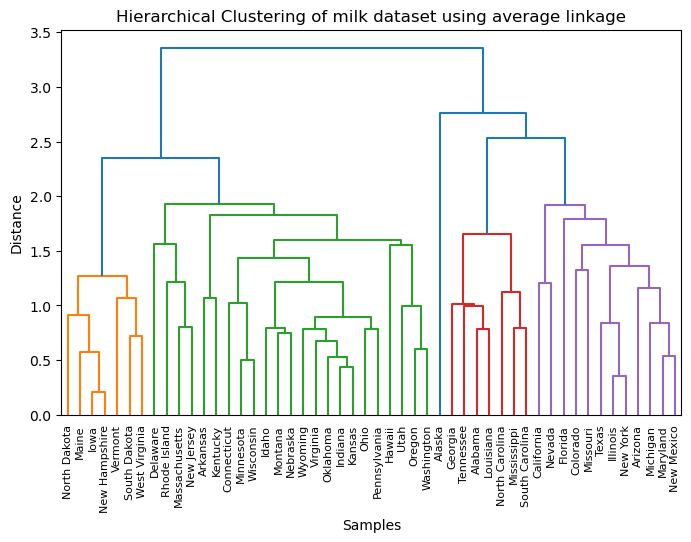

In [20]:
link = "average"
mergings = linkage(df_scaled, method=link)

plt.figure(figsize=(8,5))
dendrogram(mergings, labels=df_scaled.index)
plt.title(f"Hierarchical Clustering of milk dataset using {link} linkage")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.xticks(rotation=90)    
plt.show()

#### Using  AgglomerativeClustering

Evaluate Silhouette score for different nmbers of cluster 

In [27]:
scores = []
no_clusters = [2,3,4,5,6,7,8,9]
for i in no_clusters:
    clust = ag_clust = AgglomerativeClustering(
        n_clusters=i, 
        linkage='average'
    )

    clust.fit(df_scaled)

    scores.append(
        silhouette_score(df_scaled, clust.labels_)
    )

print(scores)

index_max = np.argmax(scores)
best_no_clust = no_clusters[index_max]
print('Best number of clusters', best_no_clust)

[0.4084890326217641, 0.34863679190476177, 0.3636819420151221, 0.3212682619092323, 0.2719787783719339, 0.2507421522912214, 0.22076298935497146, 0.20960529040521791]
Best number of clusters 2


In [28]:
ag_clust = AgglomerativeClustering(
    n_clusters=best_no_clust,       # Best no. of clusters from previous analysis
    linkage='average'
)

ag_clust.fit(df_scaled)

print(
    'Silhouette Score:', 
    silhouette_score(df_scaled, ag_clust.labels_)
)

Silhouette Score: 0.4084890326217641


In [23]:
df_clusters = pd.DataFrame({
    'Cluster': ag_clust.labels_,
    }, index=df_scaled.index
).sort_values('Cluster')

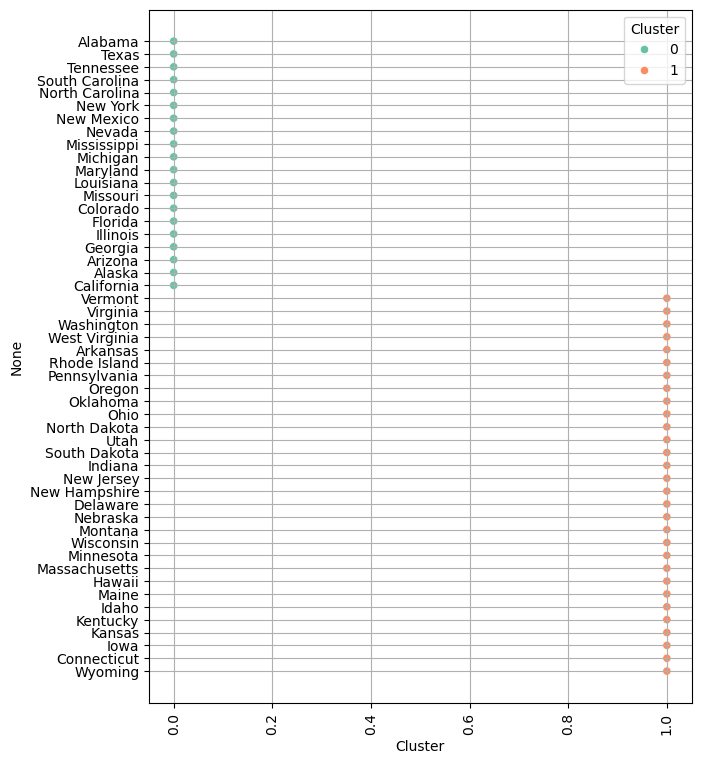

In [25]:
plt.figure(figsize=(7, 9))
sns.scatterplot(
    x='Cluster', 
    y=df_clusters.index,
    hue='Cluster', 
    data=df_clusters, 
    palette='Set2'
)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

